# Geodesics on Learned Manifolds

In [28]:
#Modules
import jax.numpy as jnp
import jax.random as jrandom
from jax import vmap

import haiku as hk

import torchvision.utils as vutils

#numpy
import numpy as np

from abc import ABC

import torch

import matplotlib.pyplot as plt

from geodesics import GradientDescent, JAXOptimization, ScipyOptimization, GC_LineSearch

from vae.model_loader import mnist_generator, svhn_generator, celeba_generator, load_model

from vae.models.eval.mnist import Encoder as mnist_encoder
from vae.models.eval.mnist import Decoder as mnist_decoder
from vae.models.eval.mnist import VAE as mnist_vae

from vae.models.eval.svhn import Encoder as svhn_encoder
from vae.models.eval.svhn import Decoder as svhn_decoder
from vae.models.eval.svhn import VAE as svhn_vae

from vae.models.eval.celeba import Encoder as celeba_encoder
from vae.models.eval.celeba import Decoder as celeba_decoder
from vae.models.eval.celeba import VAE as celeba_vae

In [29]:
seed = 2712
model_path = 'models/'

## VAE MNIST

### Loading Data

In [30]:
mnist_dataloader = mnist_generator(seed=2712,
                                   batch_size=64,
                                   split='train[:80%]')

2024-05-31 23:16:32.867536: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


### Loading Model

In [31]:
@hk.transform
def mnist_tvae(x):


    vae = mnist_vae(
                encoder=mnist_encoder(latent_dim=8),
                decoder=mnist_decoder(),
    )

    return vae(x)

@hk.transform
def mnist_tencoder(x):


    encoder = mnist_encoder(latent_dim=16)

    return encoder(x)

@hk.transform
def mnist_tdecoder(x):

    decoder = mnist_decoder(latent_dim=16)

    return decoder(x)

In [32]:
mnist_state = load_model(''.join((model_path, 'mnist/')))

EOFError: No data left in file

In [33]:
mnist_encoder_fun = lambda x: mnist_tencoder.apply(mnist_state.params, mnist_state.rng_key, x)
mnist_decoder_fun = lambda x: mnist_tdecoder.apply(mnist_state.params, mnist_state.rng_key, x)
mnist_vae_fun = lambda x: mnist_tvae.apply(mnist_state.params, mnist_state.rng_key, x)

### Plotting Reconstruction

In [34]:
mnist_data = next(mnist_dataloader).x

In [35]:
mnist_rec = mnist_vae_fun(mnist_data)

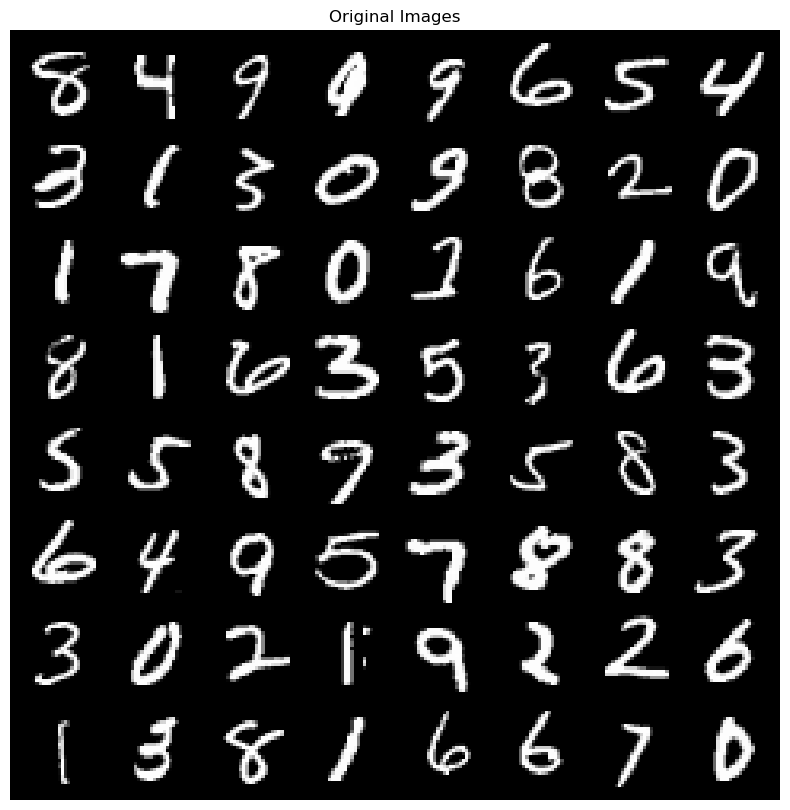

In [36]:
plot_val = torch.from_numpy(np.transpose(np.array(mnist_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

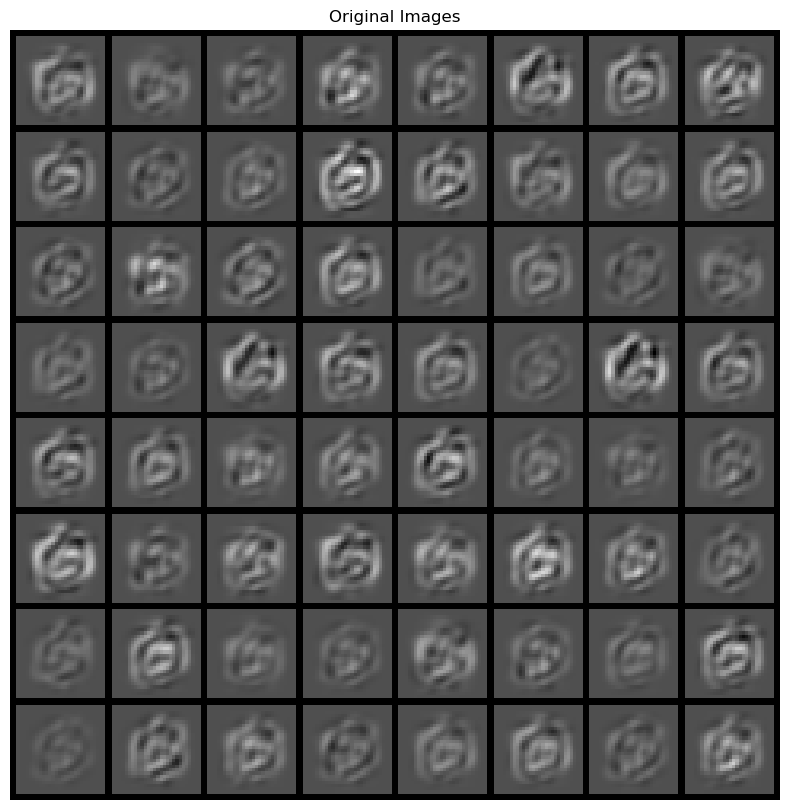

In [37]:
plot_val = torch.from_numpy(np.transpose(np.array(mnist_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

## VAE SVHN

### Loading Data

In [38]:
svhn_dataloader = svhn_generator(data_dir="../../../Data/SVHN/",
                                 batch_size=64,
                                 seed=2712,
                                 split='train[:80%]')

### Loading Model

In [39]:
@hk.transform
def svhn_tvae(x):


    vae = svhn_vae(
                encoder=svhn_encoder(latent_dim=32),
                decoder=svhn_decoder(),
    )

    return vae(x)

@hk.transform
def svhn_tencoder(x):


    encoder = svhn_encoder(latent_dim=32)

    return encoder(x)

@hk.transform
def svhn_tdecoder(x):

    decoder = svhn_decoder(latent_dim=32)

    return decoder(x)

In [40]:
svhn_state = load_model(''.join((model_path, 'svhn/')))

In [41]:
svhn_encoder_fun = lambda x: svhn_tencoder.apply(svhn_state.params, svhn_state.rng_key, x)
svhn_decoder_fun = lambda x: svhn_tdecoder.apply(svhn_state.params, svhn_state.rng_key, x)
svhn_vae_fun = lambda x: svhn_tvae.apply(svhn_state.params, svhn_state.rng_key, x)

### Plotting Reconstruction

In [42]:
svhn_data = next(svhn_dataloader).x

In [43]:
svhn_rec = svhn_vae_fun(svhn_data)

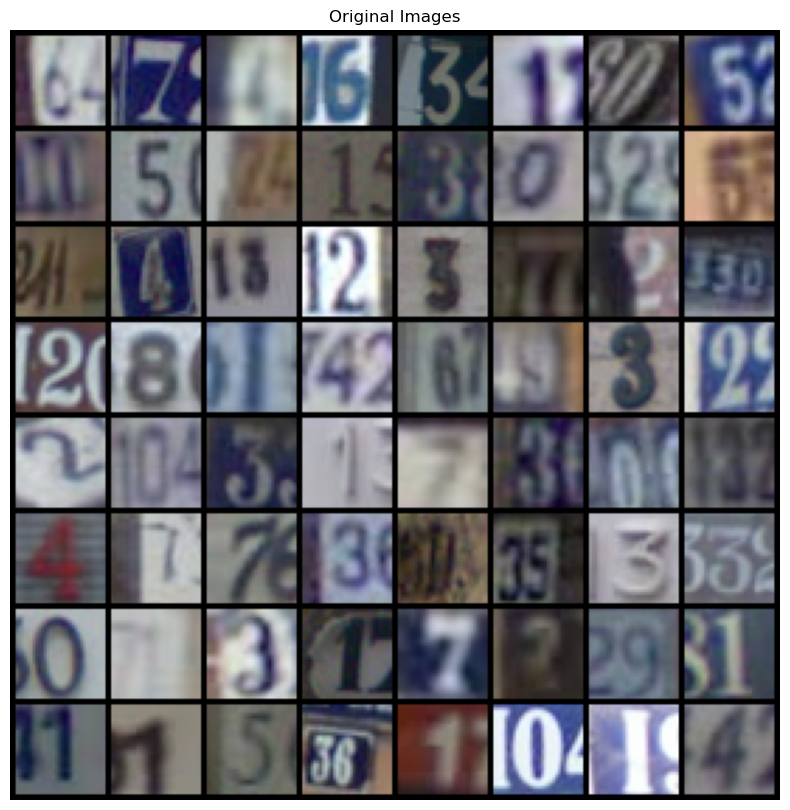

In [44]:
plot_val = torch.from_numpy(np.transpose(np.array(svhn_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

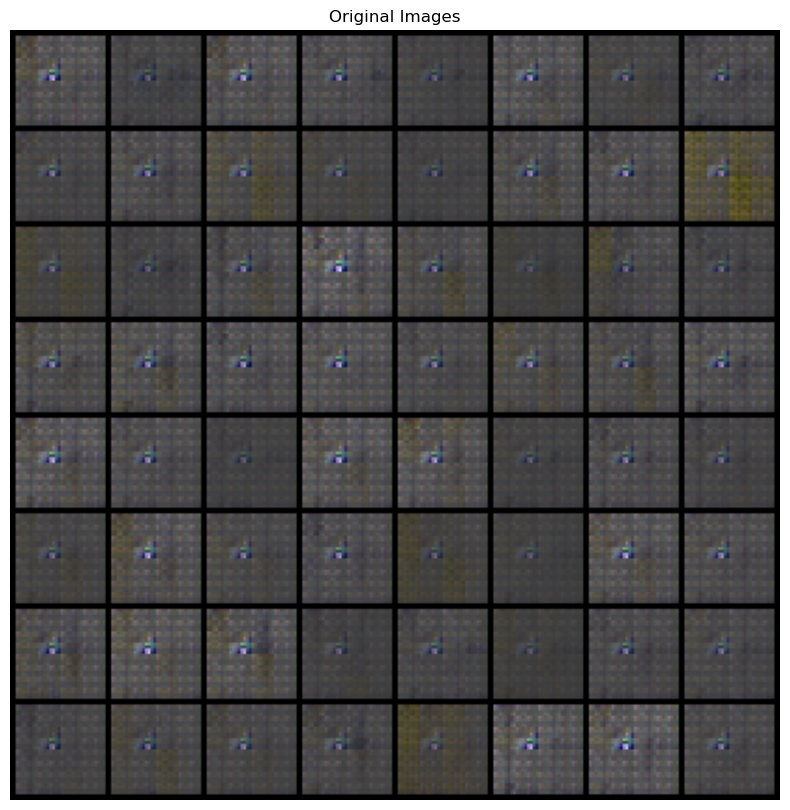

In [45]:
plot_val = torch.from_numpy(np.transpose(np.array(svhn_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

## VAE CelebA

### Loading Data

In [46]:
celeba_dataloader = celeba_generator(data_dir="../../../Data/CelebA/",
                                     batch_size=64,
                                     seed=2712, 
                                     split=0.8)

### Loading Model

In [47]:
@hk.transform
def celeba_tvae(x):


    vae = celeba_vae(
                encoder=celeba_encoder(latent_dim=32),
                decoder=celeba_decoder(),
    )

    return vae(x)

@hk.transform
def celeba_tencoder(x):


    encoder = celeba_encoder(latent_dim=32)

    return encoder(x)

@hk.transform
def celeba_tdecoder(x):

    decoder = celeba_decoder(latent_dim=32)

    return decoder(x)

In [48]:
celeba_state = load_model(''.join((model_path, 'celeba/')))

EOFError: No data left in file

In [49]:
celeba_encoder_fun = lambda x: celeba_tencoder.apply(celeba_state.params, celeba_state.rng_key, x)
celeba_decoder_fun = lambda x: celeba_tdecoder.apply(celeba_state.params, celeba_state.rng_key, x)
celeba_vae_fun = lambda x: celeba_tvae.apply(celeba_state.params, celeba_state.rng_key, x)

### Plotting Reconstruction

In [24]:
celeba_data = next(celeba_dataloader).x

In [25]:
celeba_rec = celeba_vae_fun(celeba_data)

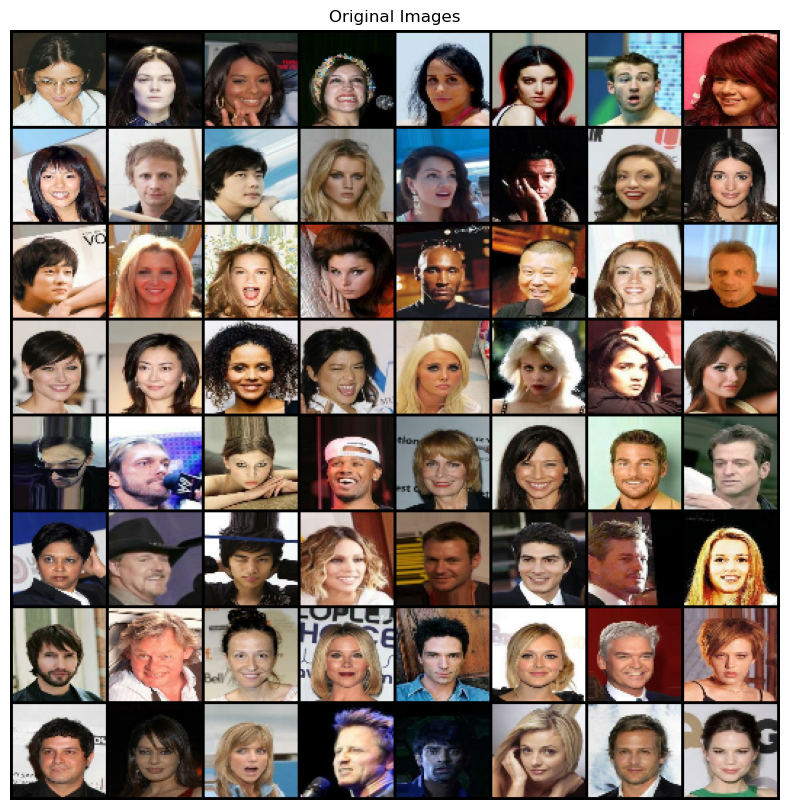

In [26]:
plot_val = torch.from_numpy(np.transpose(np.array(celeba_data), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))

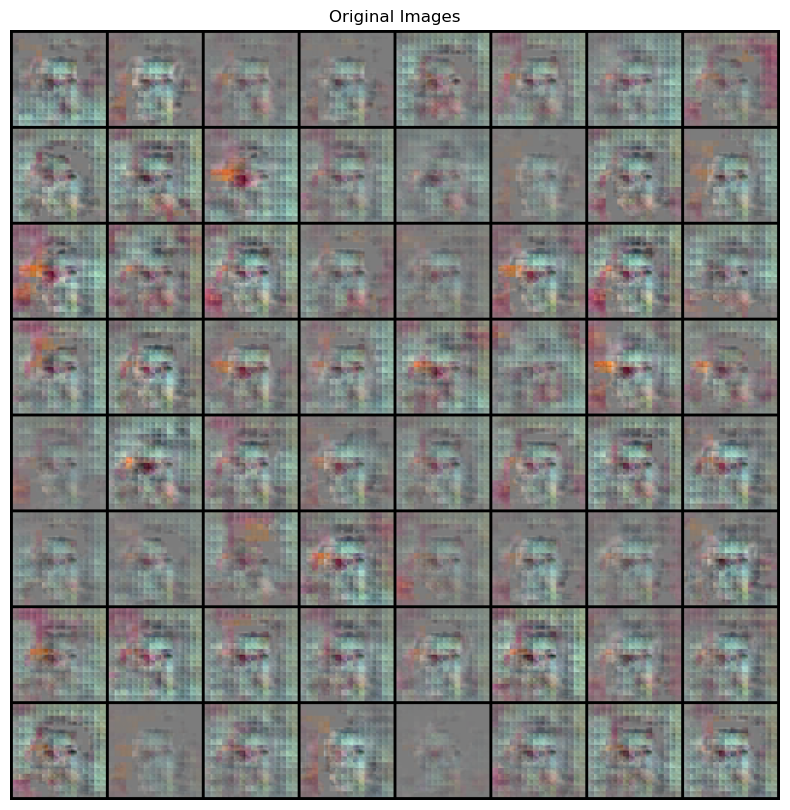

In [27]:
plot_val = torch.from_numpy(np.transpose(np.array(celeba_rec.mu_xz), (0,3,1,2)))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_axis_off()
ax.set_title("Original Images")
ax.imshow(np.transpose(vutils.make_grid(plot_val, padding=2, normalize=True).cpu(),(1,2,0)))